<a href="https://colab.research.google.com/github/bsst13/Applying-NLP-for-topic-modelling-in-a-real-life-context/blob/main/%5BGithub%5D_Applying_NLP_for_topic_modelling_in_a_real_life_context.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
file_path_google = '/content/drive/MyDrive/Google_12_months.xlsx'

df_google = pd.read_excel(file_path_google)
display(df_google.head())

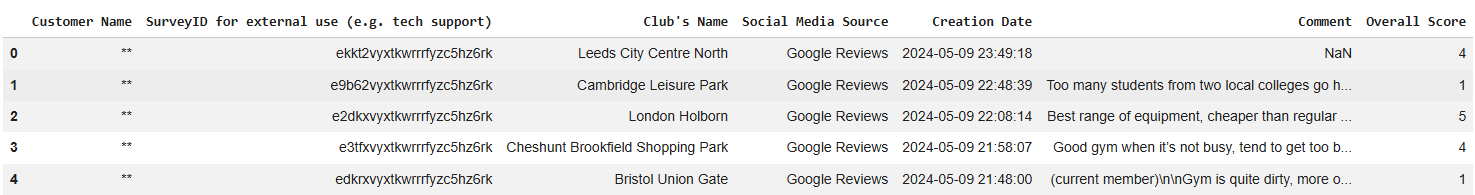

In [ ]:
file_path_tp='/content/drive/MyDrive/Trustpilot_12_months.xlsx'
df_tp=pd.read_excel(file_path_tp)
display(df_tp.head())

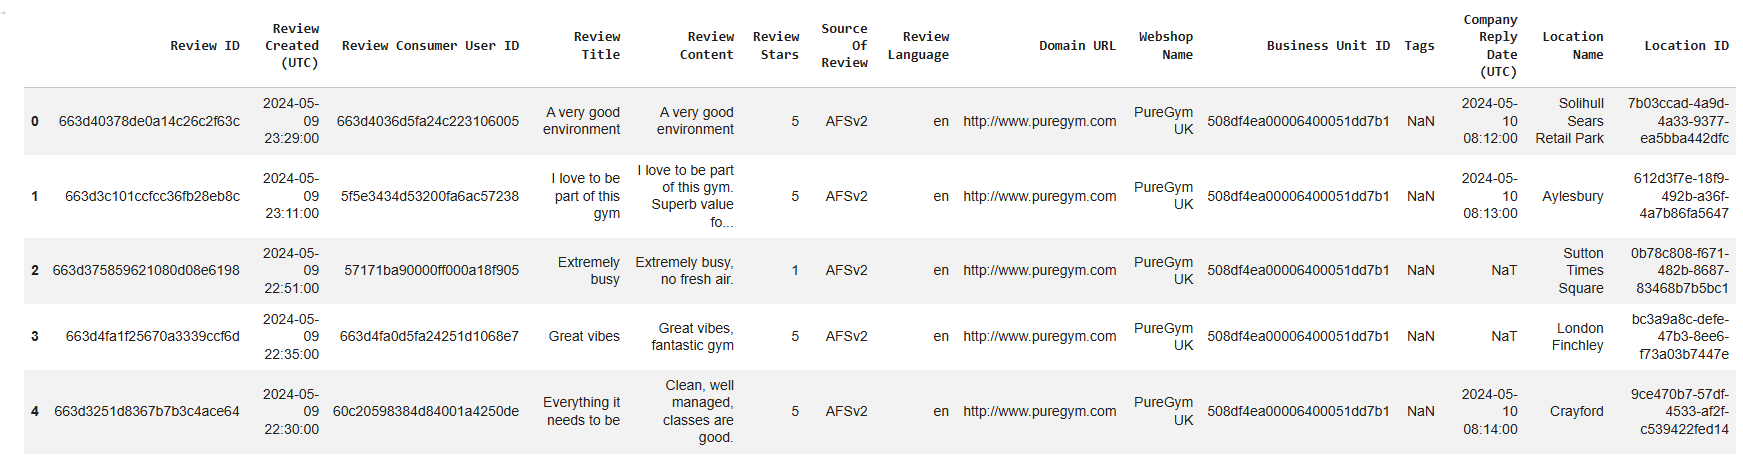

In [ ]:
df_google.dropna(subset=['Comment'], inplace=True)
df_tp.dropna(subset=['Review Content'], inplace=True)

print(df_google.shape)
print(df_tp.shape)

(13898, 7)
(16673, 15)

#Conducting initial data investigation

In [ ]:
unique_google_locations = df_google["Club's Name"].nunique()
unique_trustpilot_locations = df_tp['Location Name'].nunique()

print(f"Number of unique locations in Google data set: {unique_google_locations}")
print(f"Number of unique locations in Trustpilot data set: {unique_trustpilot_locations}")

Number of unique locations in Google data set: 512
Number of unique locations in Trustpilot data set: 376

In [ ]:
google_locations = set(df_google["Club's Name"].str.lower().unique())
trustpilot_locations = set(df_tp['Location Name'].str.lower().unique())

common_locations = google_locations.intersection(trustpilot_locations)

print(f"Number of common locations between Google and Trustpilot data sets: {len(common_locations)}")
print(f"Common locations: {list(common_locations)[:10]} (showing first 10 if many)")

Number of common locations between Google and Trustpilot data sets: 312
Common locations: ['portishead', 'northwich', 'birmingham maypole', 'portsmouth commercial road', 'coleraine', 'rayleigh', 'altrincham', 'sunderland', 'birmingham arcadian centre', 'manchester bury new road'] (showing first 10 if many)

In [ ]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
nltk.download('punkt') # Needed for word_tokenize later

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[\W_]+', ' ', text) # Replace non-alphanumeric with space
    # Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    return text

# Apply preprocessing to Google reviews
df_google['Comment_cleaned'] = df_google['Comment'].apply(preprocess_text)

# Apply preprocessing to Trustpilot reviews
df_tp['Review Content_cleaned'] = df_tp['Review Content'].apply(preprocess_text)

print("Google reviews after preprocessing:")
display(df_google[['Comment', 'Comment_cleaned']].head())

print("\nTrustpilot reviews after preprocessing:")
display(df_tp[['Review Content', 'Review Content_cleaned']].head())

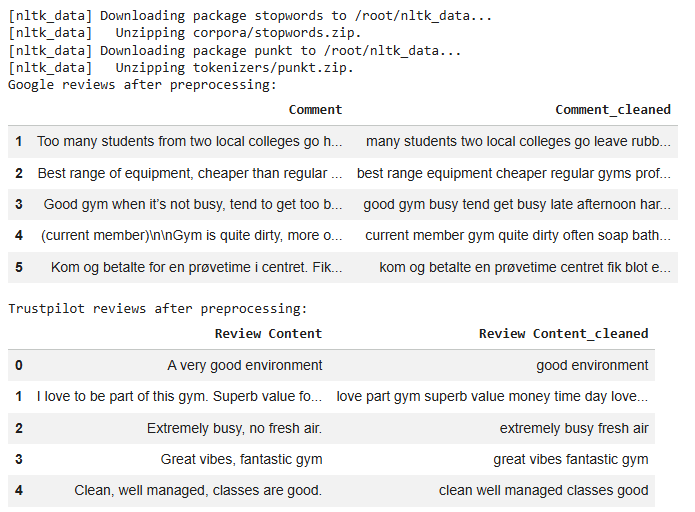

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Tokenize Google reviews
df_google['Comment_tokenized'] = df_google['Comment_cleaned'].apply(word_tokenize)

# Tokenize Trustpilot reviews
df_tp['Review_Content_tokenized'] = df_tp['Review Content_cleaned'].apply(word_tokenize)

print("Google reviews after tokenization:")
display(df_google[['Comment_cleaned', 'Comment_tokenized']].head())

print("\nTrustpilot reviews after tokenization:")
display(df_tp[['Review Content_cleaned', 'Review_Content_tokenized']].head())

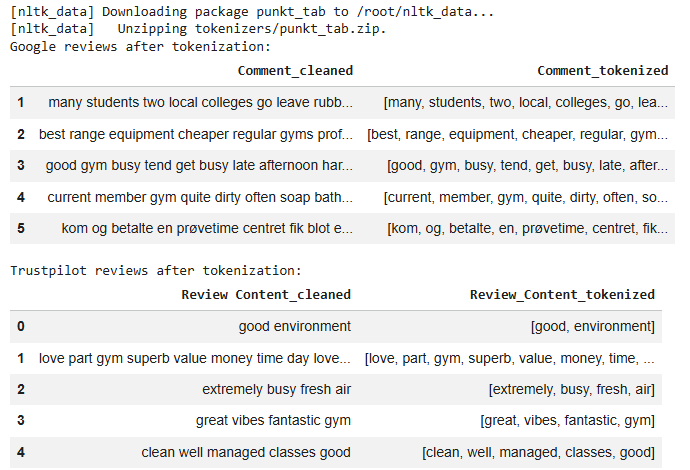

In [ ]:
from nltk.probability import FreqDist

# Combine all tokenized words from Google reviews
all_google_words = [word for sublist in df_google['Comment_tokenized'] for word in sublist]

# Get frequency distribution for Google reviews
freq_dist_google = FreqDist(all_google_words)

print("Frequency Distribution for Google Reviews (Top 10 words):")
print(freq_dist_google.most_common(10))

Frequency Distribution for Google Reviews (Top 10 words):
[('gym', 10031), ('equipment', 3641), ('great', 3569), ('good', 3466), ('staff', 2785), ('classes', 2327), ('clean', 1853), ('friendly', 1752), ('machines', 1729), ('always', 1693)]

In [ ]:
# Combine all tokenized words from Trust Pilot
all_tp_words = [word for sublist in df_tp['Review_Content_tokenized'] for word in sublist]

# Get frequency distribution for Google reviews
freq_dist_tp = FreqDist(all_tp_words)

print("Frequency Distribution for Google Reviews (Top 10 words):")
print(freq_dist_tp.most_common(10))

Frequency Distribution for Google Reviews (Top 10 words):
[('gym', 10962), ('equipment', 4450), ('good', 4109), ('great', 3810), ('staff', 3614), ('clean', 2526), ('friendly', 2521), ('classes', 2276), ('easy', 2201), ('machines', 1780)]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the top 10 words and their frequencies for Google reviews
top_10_google = freq_dist_google.most_common(10)
df_top_10_google = pd.DataFrame(top_10_google, columns=['Word', 'Frequency'])

# Get the top 10 words and their frequencies for Trustpilot reviews
top_10_tp = freq_dist_tp.most_common(10)
df_top_10_tp = pd.DataFrame(top_10_tp, columns=['Word', 'Frequency'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Google reviews
sns.barplot(x='Word', y='Frequency', data=df_top_10_google, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Most Frequent Words in Google Reviews')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Trustpilot reviews
sns.barplot(x='Word', y='Frequency', data=df_top_10_tp, ax=axes[1], palette='magma')
axes[1].set_title('Top 10 Most Frequent Words in Trustpilot Reviews')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

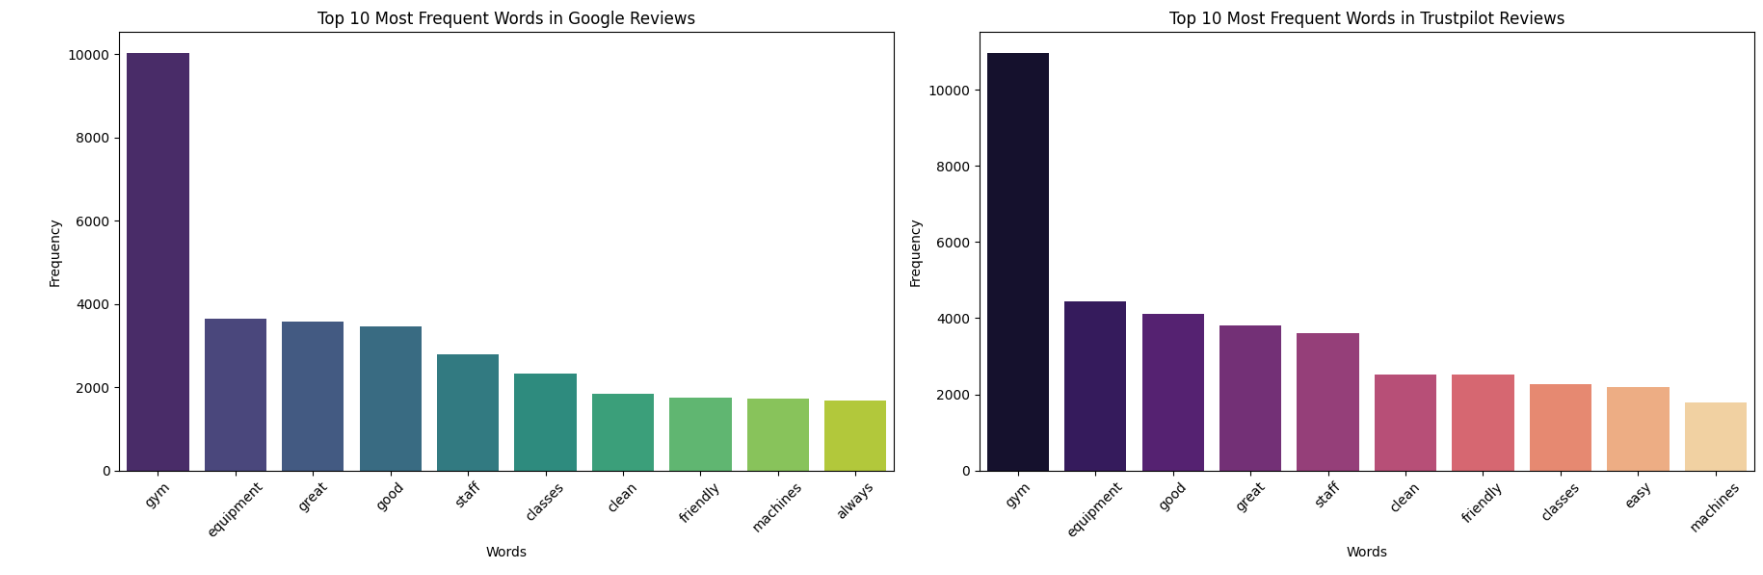

In [ ]:
from wordcloud import WordCloud

# Join all cleaned Google review comments into a single string
google_text = ' '.join(df_google['Comment_cleaned'])

# Generate a word cloud for Google reviews
wordcloud_google = WordCloud(width=800, height=400, background_color='white').generate(google_text)

# Join all cleaned Trustpilot review content into a single string
trustpilot_text = ' '.join(df_tp['Review Content_cleaned'])

# Generate a word cloud for Trustpilot reviews
wordcloud_trustpilot = WordCloud(width=800, height=400, background_color='white').generate(trustpilot_text)

# Plotting the Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(wordcloud_google, interpolation='bilinear')
axes[0].set_title('Word Cloud for Google Reviews')
axes[0].axis('off')

axes[1].imshow(wordcloud_trustpilot, interpolation='bilinear')
axes[1].set_title('Word Cloud for Trustpilot Reviews')
axes[1].axis('off')

plt.tight_layout()
plt.show()

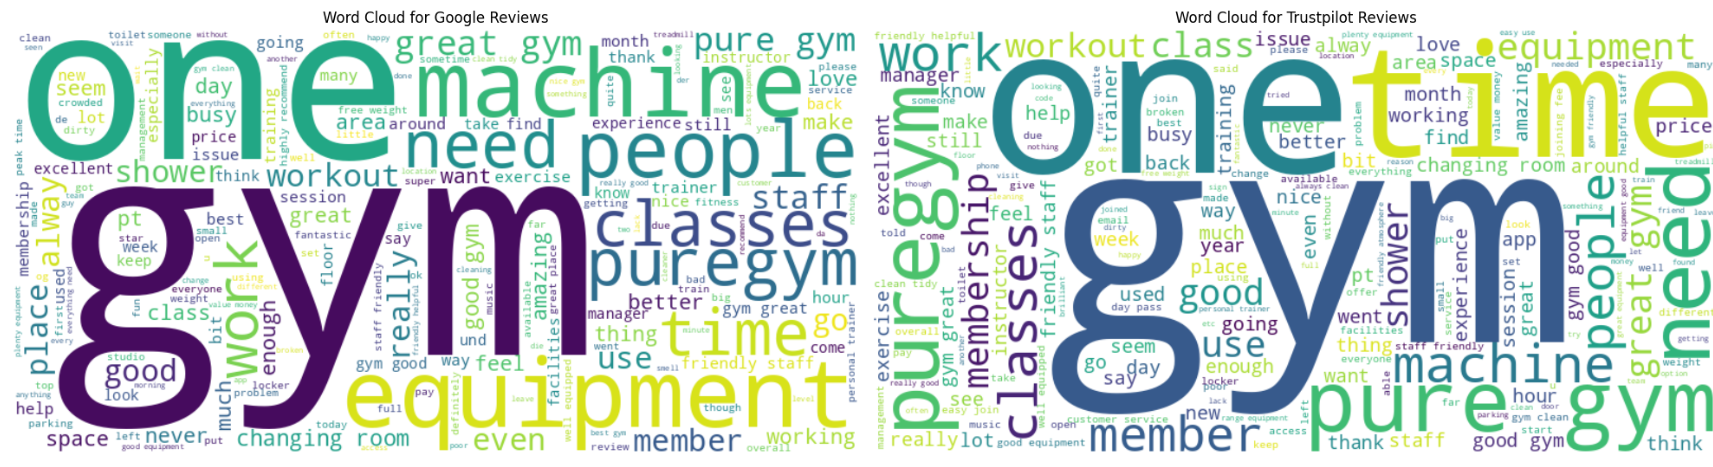

In [ ]:
# Filter Google reviews for negative scores
negative_google_reviews = df_google[df_google['Overall Score'] < 3].copy()

# Filter Trustpilot reviews for negative scores
negative_trustpilot_reviews = df_tp[df_tp['Review Stars'] < 3].copy()

print("Shape of negative Google reviews dataframe:", negative_google_reviews.shape)
print("Head of negative Google reviews:")
display(negative_google_reviews.head())

print("\nShape of negative Trustpilot reviews dataframe:", negative_trustpilot_reviews.shape)
print("Head of negative Trustpilot reviews:")
display(negative_trustpilot_reviews.head())

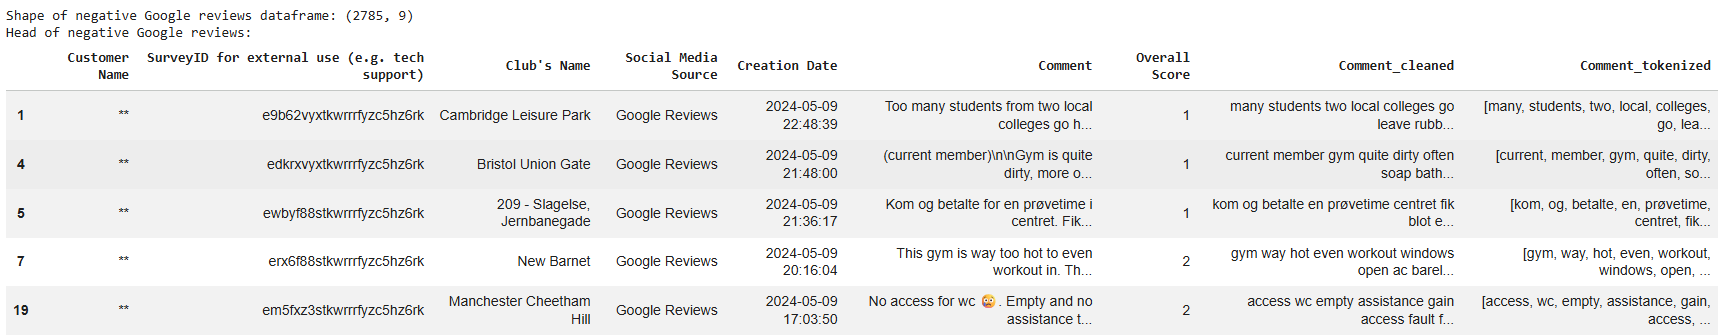

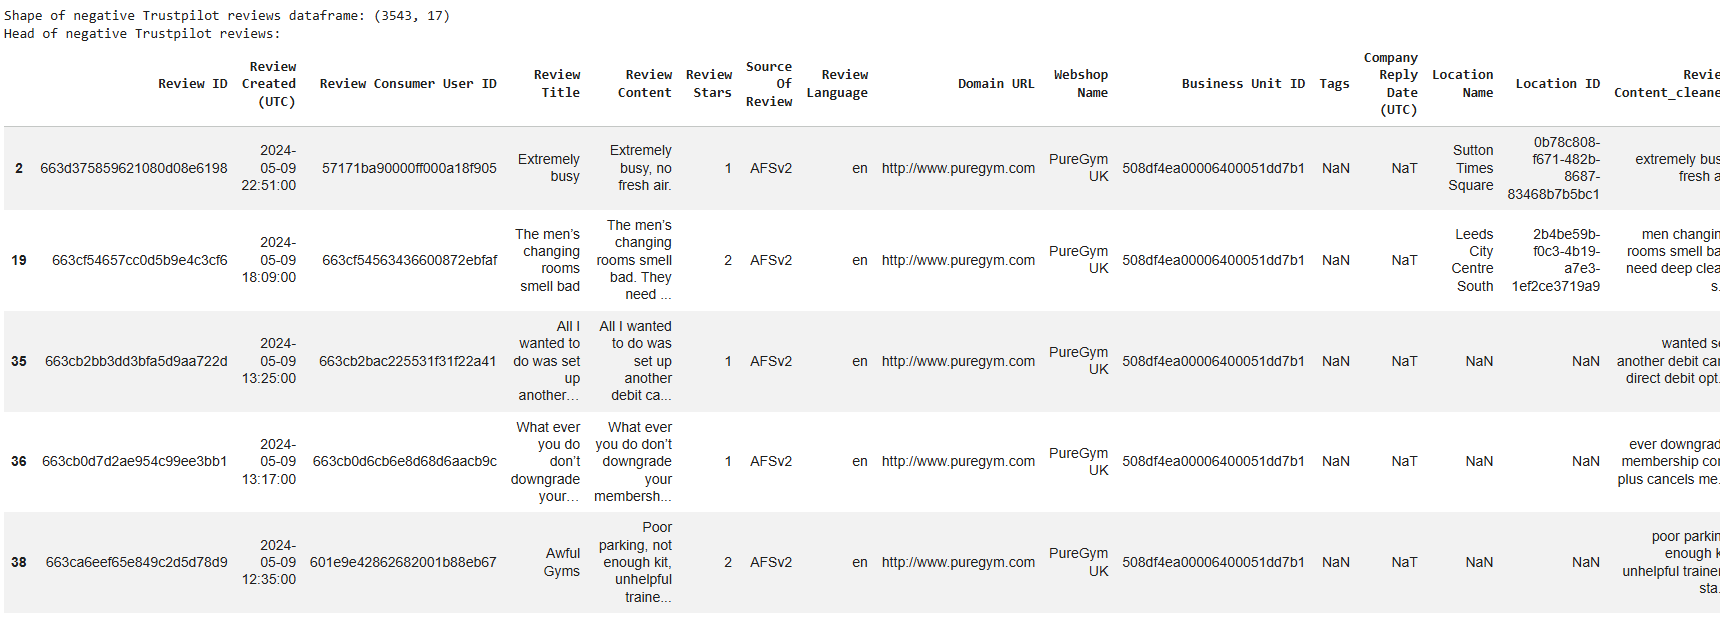

In [ ]:
# --- Frequency Distribution for Negative Reviews ---
# Combine all tokenized words from negative Google reviews
all_negative_google_words = [word for sublist in negative_google_reviews['Comment_tokenized'] for word in sublist]

# Get frequency distribution for negative Google reviews
freq_dist_negative_google = FreqDist(all_negative_google_words)

print("\nFrequency Distribution for Negative Google Reviews (Top 10 words):")
print(freq_dist_negative_google.most_common(10))

# Combine all tokenized words from negative Trustpilot reviews
all_negative_tp_words = [word for sublist in negative_trustpilot_reviews['Review_Content_tokenized'] for word in sublist]

# Get frequency distribution for negative Trustpilot reviews
freq_dist_negative_tp = FreqDist(all_negative_tp_words)

print("\nFrequency Distribution for Negative Trustpilot Reviews (Top 10 words):")
print(freq_dist_negative_tp.most_common(10))

# --- Plotting Top 10 Words for Negative Reviews ---
# Get the top 10 words and their frequencies for negative Google reviews
top_10_negative_google = freq_dist_negative_google.most_common(10)
df_top_10_negative_google = pd.DataFrame(top_10_negative_google, columns=['Word', 'Frequency'])

# Get the top 10 words and their frequencies for negative Trustpilot reviews
top_10_negative_tp = freq_dist_negative_tp.most_common(10)
df_top_10_negative_tp = pd.DataFrame(top_10_negative_tp, columns=['Word', 'Frequency'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for negative Google reviews
sns.barplot(x='Word', y='Frequency', data=df_top_10_negative_google, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Most Frequent Words in Negative Google Reviews')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot for negative Trustpilot reviews
sns.barplot(x='Word', y='Frequency', data=df_top_10_negative_tp, ax=axes[1], palette='magma')
axes[1].set_title('Top 10 Most Frequent Words in Negative Trustpilot Reviews')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# --- Word Cloud for Negative Reviews ---
# Join all cleaned negative Google review comments into a single string
negative_google_text = ' '.join(negative_google_reviews['Comment_cleaned'])

# Generate a word cloud for negative Google reviews
wordcloud_negative_google = WordCloud(width=800, height=400, background_color='white').generate(negative_google_text)

# Join all cleaned negative Trustpilot review content into a single string
negative_trustpilot_text = ' '.join(negative_trustpilot_reviews['Review Content_cleaned'])

# Generate a word cloud for negative Trustpilot reviews
wordcloud_negative_trustpilot = WordCloud(width=800, height=400, background_color='white').generate(negative_trustpilot_text)

# Plotting the Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(wordcloud_negative_google, interpolation='bilinear')
axes[0].set_title('Word Cloud for Negative Google Reviews')
axes[0].axis('off')

axes[1].imshow(wordcloud_negative_trustpilot, interpolation='bilinear')
axes[1].set_title('Word Cloud for Negative Trustpilot Reviews')
axes[1].axis('off')

plt.tight_layout()
plt.show()

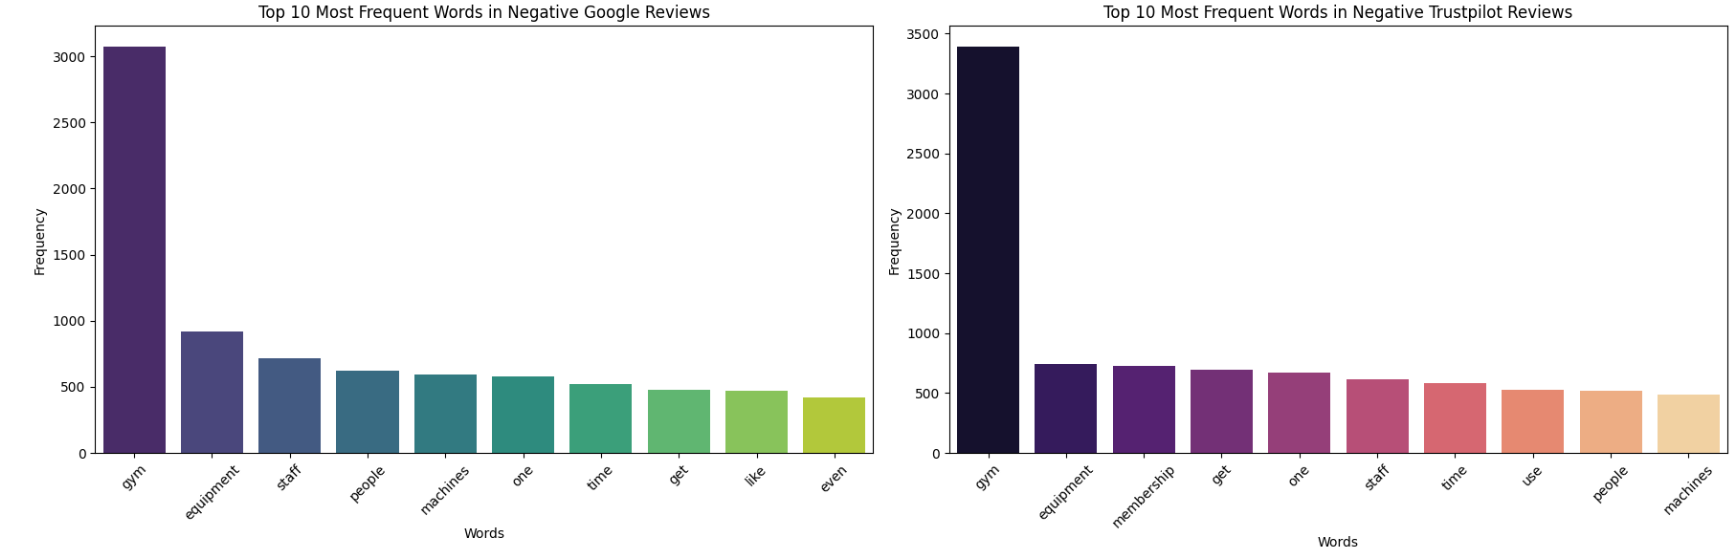

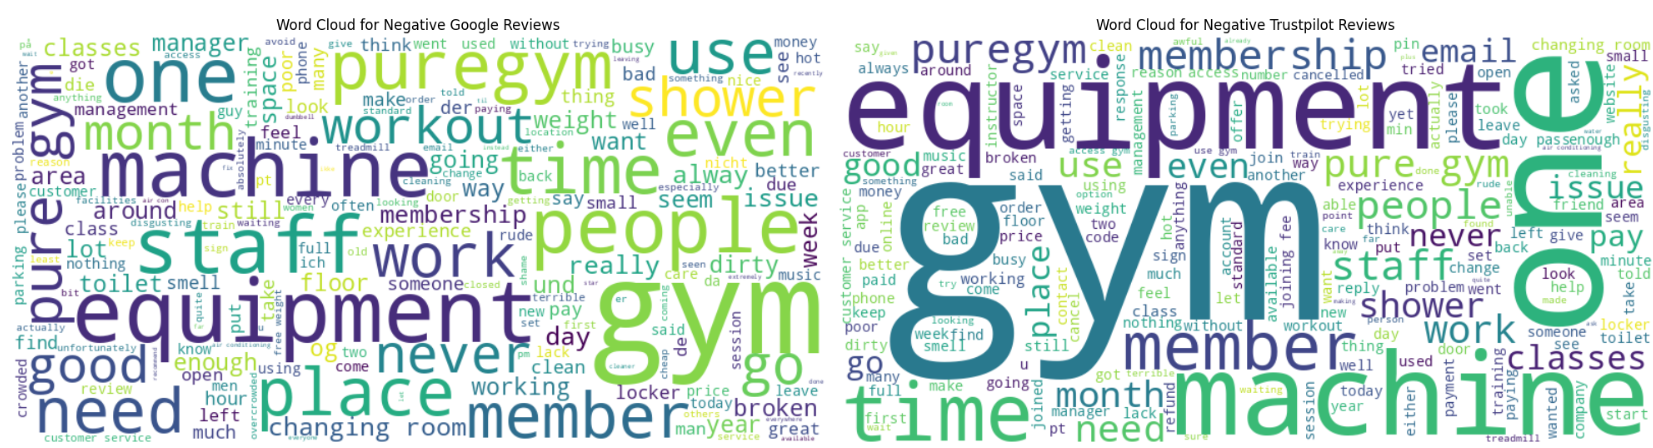

#Conducting initial topic modelling:

In [ ]:
# Ensure location names are lowercase for consistent matching
negative_google_reviews['location_lower'] = negative_google_reviews["Club's Name"].str.lower()
negative_trustpilot_reviews['location_lower'] = negative_trustpilot_reviews['Location Name'].str.lower()

# Filter out reviews from locations common to both data sets
filtered_negative_google_reviews = negative_google_reviews[negative_google_reviews['location_lower'].isin(common_locations)]
filtered_negative_trustpilot_reviews = negative_trustpilot_reviews[negative_trustpilot_reviews['location_lower'].isin(common_locations)]

# Merge the cleaned reviews into a new list
# Extract the cleaned review content
google_reviews_for_topic_modeling = filtered_negative_google_reviews['Comment_cleaned'].tolist()
trustpilot_reviews_for_topic_modeling = filtered_negative_trustpilot_reviews['Review Content_cleaned'].tolist()

# Combine into a single list
all_negative_reviews_common_locations = google_reviews_for_topic_modeling + trustpilot_reviews_for_topic_modeling

print(f"Number of negative Google reviews from common locations: {len(google_reviews_for_topic_modeling)}")
print(f"Number of negative Trustpilot reviews from common locations: {len(trustpilot_reviews_for_topic_modeling)}")
print(f"Total number of negative reviews from common locations for topic modeling: {len(all_negative_reviews_common_locations)}")

# Display the first few merged reviews to verify
print("\nFirst 5 merged reviews:")
for i in range(min(5, len(all_negative_reviews_common_locations))):
    print(all_negative_reviews_common_locations[i])

Number of negative Google reviews from common locations: 2117
Number of negative Trustpilot reviews from common locations: 1868
Total number of negative reviews from common locations for topic modeling: 3985

First 5 merged reviews:
many students two local colleges go leave rubbish changing rooms sit like canteen going years cancel membership go gym group gym disgusting students hanging around machines messing around like school crowded ceo supports genocide civilians israel disgusting people
current member gym quite dirty often soap bathroom zero airflow gym like sauna also gym often overcrowded anytime pm good thing gym location bring buddy thing
gym way hot even workout windows open ac barely works staff near friendly always rude especially men clients mean work
access wc empty assistance gain access fault forgot pin see stay enable assistance
gym year finally leaving gutted staff pts lovely stand overcrowded gym hours day lack equipment relation st james puregym going closing june even new upgrade eldon see going work gym already crowded think bit extra equipment help mention hot times year understand need heating gym supposed busting sweat becomes unbearable summer impossible complete workout lack aircon st james gym closing reason left ridiculously overcrowded

In [ ]:
pip install bertopic umap-learn hdbscan scikit-learn

In [ ]:
from bertopic import BERTopic

# Initialize BERTopic model
# Using default parameters for the initial run as specified in the instructions
model = BERTopic()

# Fit the BERTopic model to the preprocessed negative reviews
topics, probabilities = model.fit_transform(all_negative_reviews_common_locations)

print(f"Number of topics identified: {len(model.get_topics())}")
print("BERTopic model fitted successfully.")

In [ ]:
topics_df = model.get_topic_info()
print("Top topics along with their document frequencies:")
display(topics_df[['Topic', 'Count', 'Name']].head(10))

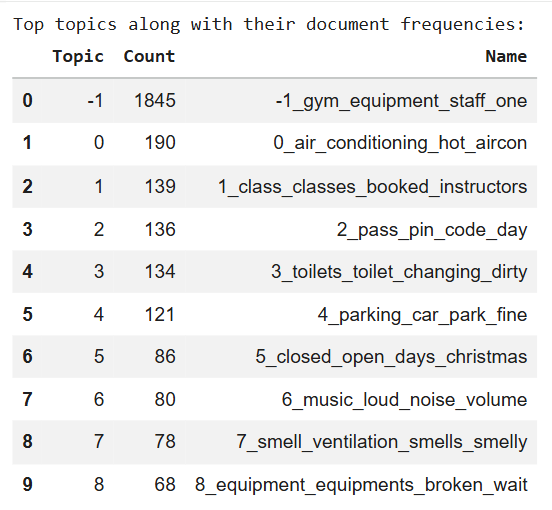

In [ ]:
print("Top words for the top 2 topics:")
# Exclude topic -1 (noise/outliers) and sort by count
top_2_topics = topics_df[topics_df['Topic'] != -1].sort_values(by='Count', ascending=False).head(2)

for index, row in top_2_topics.iterrows():
    topic_id = row['Topic']
    topic_name = row['Name']
    top_words = model.get_topic(topic_id)
    print(f"\nTopic {topic_id} ({topic_name}):")
    print([word for word, score in top_words])

Top words for the top 2 topics:

Topic 0 (0_air_conditioning_hot_aircon):
['air', 'conditioning', 'hot', 'aircon', 'con', 'summer', 'heat', 'ac', 'working', 'temperature']

Topic 1 (1_class_classes_booked_instructors):
['class', 'classes', 'booked', 'instructors', 'instructor', 'cancelled', 'spin', 'time', 'booking', 'people']

In [ ]:
model.visualize_topics()

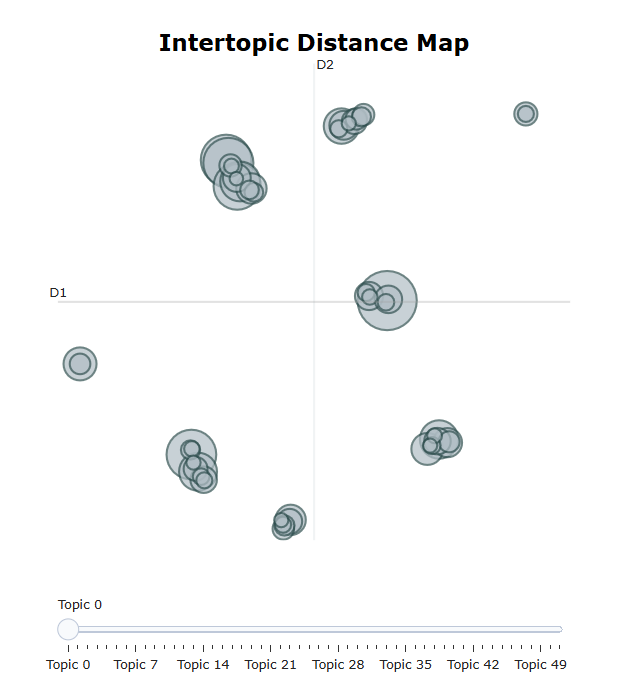

In [ ]:
model.visualize_barchart(top_n_topics=10, n_words=5)

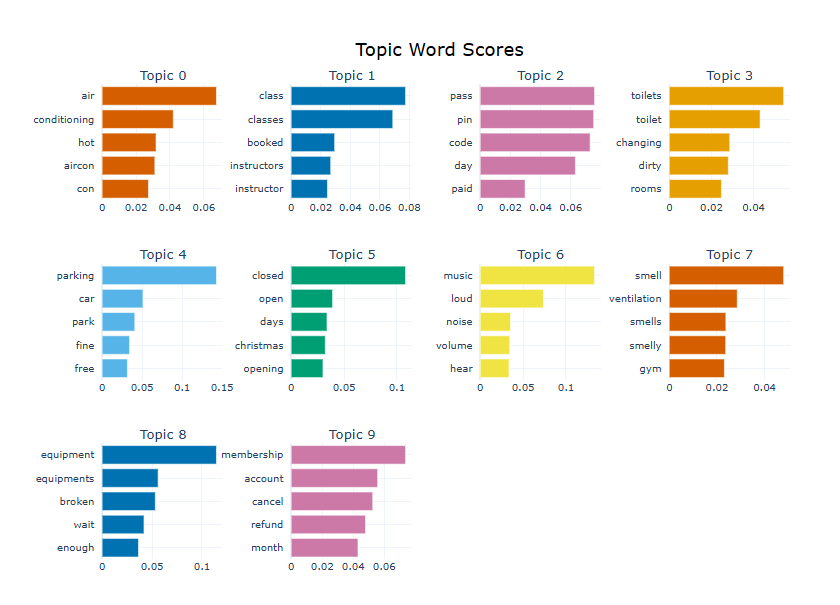

In [ ]:
model.visualize_heatmap()

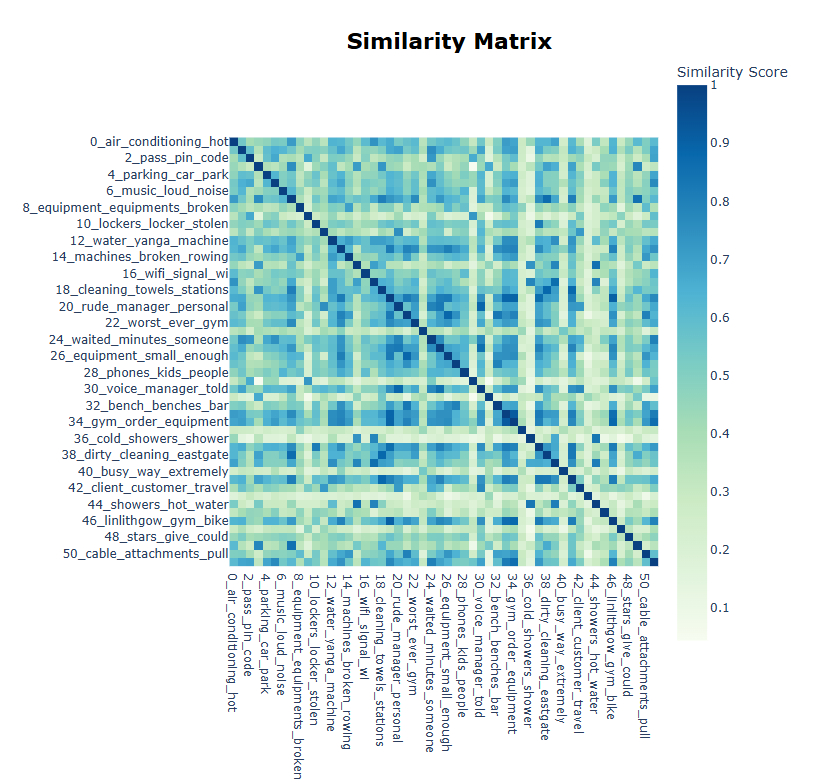


The initial BERTopic analysis of negative PureGym reviews from common locations identified several recurring themes of concern for members:
*   **Environmental Factors**: A significant issue was the lack of effective air conditioning, leading to excessively hot gym environments.
*   **Operational Access**: Members experienced difficulties related to gym entry, often involving problems with PINs or membership verification.
*   **Facility Upkeep**: Cleanliness was a concern, particularly regarding toilets and changing rooms.
*   **Equipment Management**: Issues included broken or insufficient equipment, specifically mentioning problems with dumbells, plates, bench etc.
*   **Member Experience**: Other problems encompassed difficulties with class bookings, general noise levels (e.g., loud music), and external factors like parking.



#Performing further data investigation:

In [ ]:
top_20_trustpilot_negative_locations = negative_trustpilot_reviews['Location Name'].value_counts().head(20)

print("Top 20 locations with the highest number of negative Trustpilot reviews:")
display(top_20_trustpilot_negative_locations)

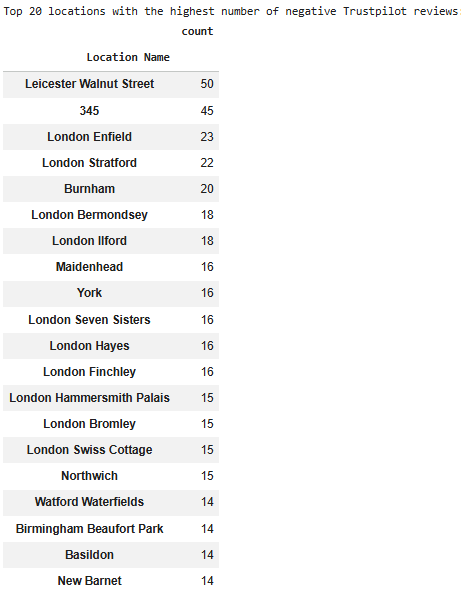

In [ ]:
top_20_google_negative_locations = negative_google_reviews["Club's Name"].value_counts().head(20)

print("Top 20 locations with the highest number of negative Google reviews:")
display(top_20_google_negative_locations)

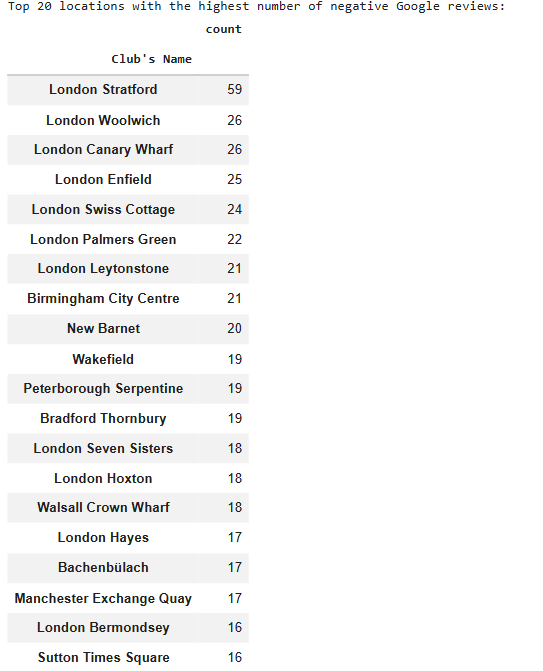

### Comment on Top 20 Negative Review Locations

**Comparison of Top 20 Locations with Highest Negative Reviews (Google vs. Trustpilot):**

Upon reviewing the top 20 locations with the highest number of negative reviews from both Google and Trustpilot, several observations can be made:

1.  **Overlap in Major Cities:** Both lists show a significant concentration of negative reviews in major cities, particularly London. Locations like 'London Stratford', 'London Enfield', 'London Swiss Cottage', 'London Hayes', and 'London Seven Sisters' appear on both lists, indicating that these high-traffic urban gyms might experience a higher volume of feedback, including negative ones, due to their larger member base or potentially shared issues.

2.  **Specific Locations with High Discrepancy:**
    *   **Leicester Walnut Street** and **345** (likely another specific location identifier) appear prominently at the top of the Trustpilot list with 50 and 45 negative reviews respectively, but they are not in the top 20 for Google reviews. This suggests that these locations might have a more pronounced negative sentiment on Trustpilot or a different review demographic on each platform.
    *   Similarly, **London Woolwich**, **London Canary Wharf**, **London Palmers Green**, and **New Barnet** are high on the Google list but do not appear in Trustpilot's top 20, indicating platform-specific issues or review patterns.

3.  **Overall Similarity:** While there are specific differences, the lists are **roughly similar** in that many common urban areas are represented. The presence of several London boroughs and other major cities like Birmingham and Manchester (though Manchester appears only once in Google's top 20 and not in Trustpilot's) indicates that issues are not necessarily isolated to one or two specific gyms but are spread across various busy locations.

4.  **Possible Factors for Differences:** The discrepancies could be attributed to several factors:
    *   **User Demographics:** Different user bases on Google Reviews and Trustpilot might have varying experiences or tendencies to leave reviews.
    *   **Review Volume:** A location might have a very high total volume of reviews on one platform, leading to more negative reviews overall, even if the percentage of negative reviews is not exceptionally high.
    *   **Specific Campaigns/Events:** Targeted campaigns or specific local issues might drive more reviews to one platform over another.

In conclusion, there is a notable overlap in problematic locations, especially in London. However, each platform also highlights unique locations with a high volume of negative feedback, suggesting that a holistic view requires considering both data sources.

In [ ]:
negative_google_reviews_copy = negative_google_reviews.copy()
negative_google_reviews_copy.rename(columns={
    "Club's Name": 'Location_Name_Standardized'
}, inplace=True)

negative_trustpilot_reviews_copy = negative_trustpilot_reviews.copy()
negative_trustpilot_reviews_copy.rename(columns={
    'Location Name': 'Location_Name_Standardized'
}, inplace=True)

print("Negative Google Reviews (copy) with standardized location name:")
display(negative_google_reviews_copy.head())

print("Negative Trustpilot Reviews (copy) with standardized location name:")
display(negative_trustpilot_reviews_copy.head())

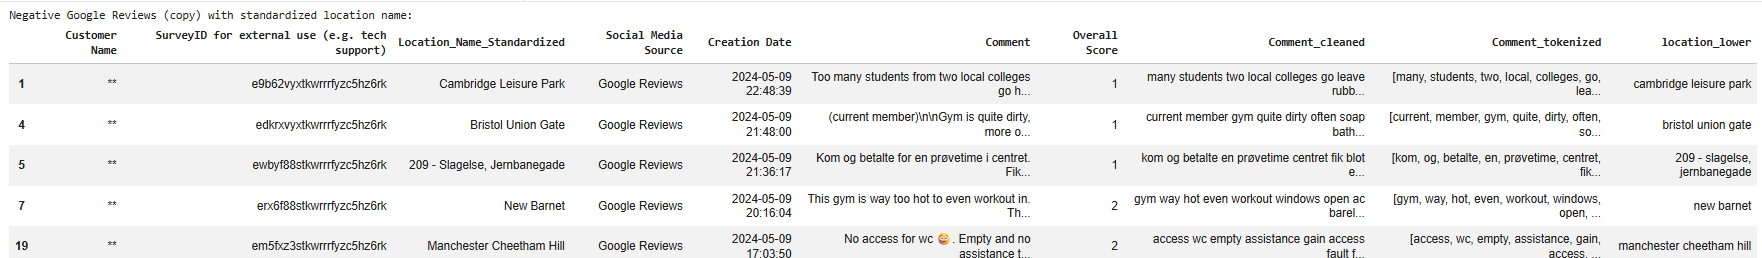

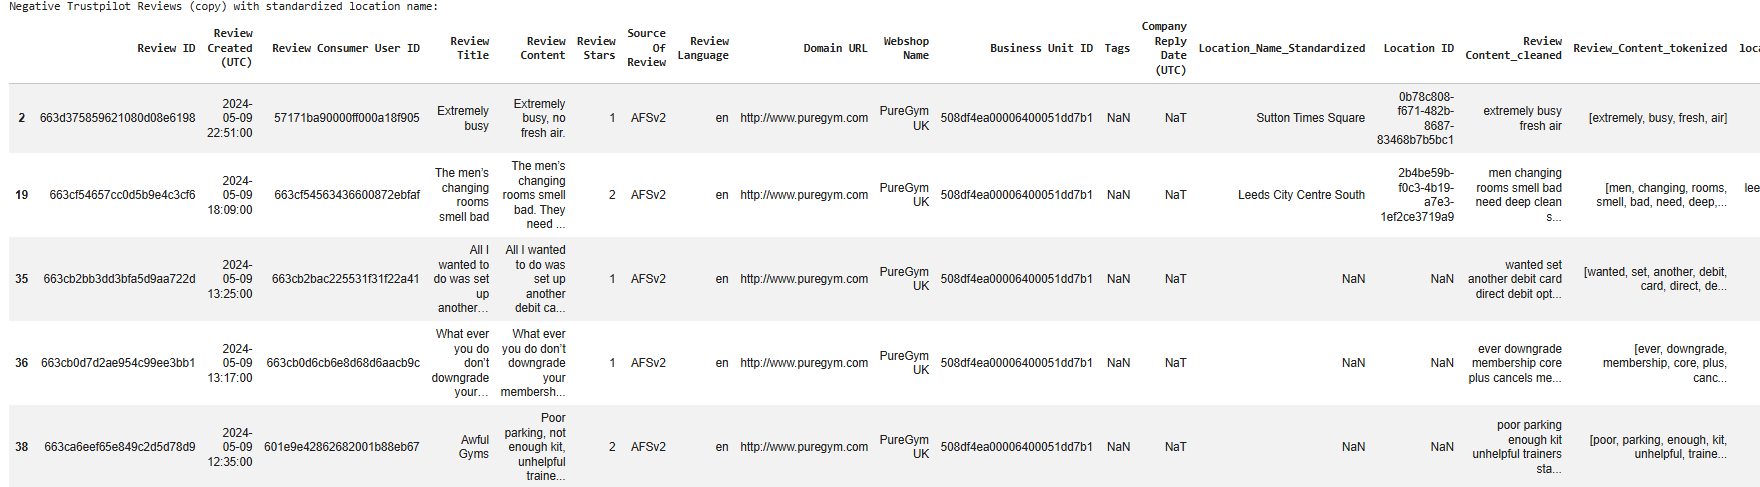

In [ ]:
google_negative_counts = negative_google_reviews_copy.groupby('Location_Name_Standardized').size().reset_index(name='Google_Negative_Review_Count')
trustpilot_negative_counts = negative_trustpilot_reviews_copy.groupby('Location_Name_Standardized').size().reset_index(name='Trustpilot_Negative_Review_Count')

# Merge the two count dataframes on the standardized location name
merged_negative_review_counts = pd.merge(
    google_negative_counts,
    trustpilot_negative_counts,
    on='Location_Name_Standardized',
    how='outer'  # Use 'outer' to keep all locations, even if they only appear in one dataset
)

# Fill NaN values with 0 for locations that don't have reviews in one of the datasets
merged_negative_review_counts['Google_Negative_Review_Count'] = merged_negative_review_counts['Google_Negative_Review_Count'].fillna(0).astype(int)
merged_negative_review_counts['Trustpilot_Negative_Review_Count'] = merged_negative_review_counts['Trustpilot_Negative_Review_Count'].fillna(0).astype(int)

# Calculate the total number of reviews for each location
merged_negative_review_counts['Total_Negative_Review_Count'] = merged_negative_review_counts['Google_Negative_Review_Count'] + merged_negative_review_counts['Trustpilot_Negative_Review_Count']

# Sort by total number of reviews in descending order
merged_negative_review_counts = merged_negative_review_counts.sort_values(by='Total_Negative_Review_Count', ascending=False)

print("Merged negative review counts by location:")
display(merged_negative_review_counts.head())

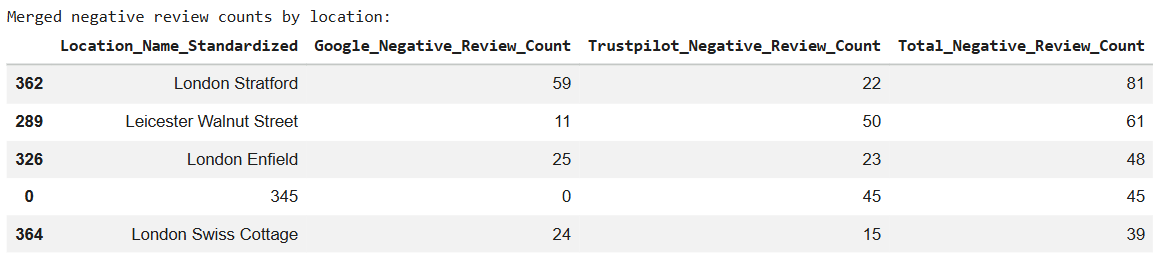

In [ ]:
top_30_negative_locations = merged_negative_review_counts['Location_Name_Standardized'].head(30).str.lower().tolist()

# Filter Google reviews for the top 30 locations
filtered_negative_google_top30 = negative_google_reviews[negative_google_reviews['location_lower'].isin(top_30_negative_locations)].copy()

# Filter Trustpilot reviews for the top 30 locations
filtered_negative_trustpilot_top30 = negative_trustpilot_reviews[negative_trustpilot_reviews['location_lower'].isin(top_30_negative_locations)].copy()

# Extract cleaned reviews into lists
google_reviews_top30 = filtered_negative_google_top30['Comment_cleaned'].tolist()
trustpilot_reviews_top30 = filtered_negative_trustpilot_top30['Review Content_cleaned'].tolist()

# Combine the two lists
all_negative_reviews_top30_locations = google_reviews_top30 + trustpilot_reviews_top30

print(f"Number of Google reviews from top 30 locations: {len(google_reviews_top30)}")
print(f"Number of Trustpilot reviews from top 30 locations: {len(trustpilot_reviews_top30)}")
print(f"Total number of negative reviews from top 30 locations: {len(all_negative_reviews_top30_locations)}")

print("\nFirst 5 combined reviews from top 30 locations:")
for i in range(min(5, len(all_negative_reviews_top30_locations))):
    print(all_negative_reviews_top30_locations[i])

Number of Google reviews from top 30 locations: 530
Number of Trustpilot reviews from top 30 locations: 1749
Total number of negative reviews from top 30 locations: 2279

First 5 combined reviews from top 30 locations:
gym way hot even workout windows open ac barely works staff near friendly always rude especially men clients mean work

air conditioning doesnt work


pure gym staff allowed blame annoying people hoxton get second time working guy clear brown hair work gym start blame dressing heavy metal shirt singer band criminal past pure gym employee blaming wonder guy make circus hip hop rock shirt go amy winehouse shirt would like pure gym staff bother telling drug addicted point suggest pure gym better choose page wages guy ruined mood work today


absolute filthy toilet machines machines usually broken timeline fix cleaners seem clean machine covid sanitisation stations removed like learn anything went christmas got sick straight away loads times hand wash toilet tissue tissue dispensers wall gym closes randomly without prior notice except piece paper saying closed today sorry inconvenience always hotbed germs proper aircon staff seem ignorant times abit shame really better


overcrowded full teenagers look plus would really benefit bit cleaning

In [ ]:
google_tokenized_top30 = filtered_negative_google_top30['Comment_tokenized'].tolist()
trustpilot_tokenized_top30 = filtered_negative_trustpilot_top30['Review_Content_tokenized'].tolist()
all_tokenized_reviews_top30_locations = google_tokenized_top30 + trustpilot_tokenized_top30

google_cleaned_top30 = filtered_negative_google_top30['Comment_cleaned'].tolist()
trustpilot_cleaned_top30 = filtered_negative_trustpilot_top30['Review Content_cleaned'].tolist()
all_cleaned_reviews_top30_locations = google_cleaned_top30 + trustpilot_cleaned_top30


In [ ]:
# Combine all tokenized words from the top 30 negative reviews
all_words_top30_locations = [word for sublist in all_tokenized_reviews_top30_locations for word in sublist]

# Get frequency distribution
freq_dist_top30_locations = FreqDist(all_words_top30_locations)

print("Frequency Distribution for Negative Reviews from Top 30 Locations (Top 10 words):")
print(freq_dist_top30_locations.most_common(10))

Frequency Distribution for Negative Reviews from Top 30 Locations (Top 10 words):
[('gym', 2040), ('membership', 495), ('get', 453), ('one', 366), ('equipment', 365), ('time', 337), ('staff', 330), ('people', 328), ('use', 320), ('puregym', 303)]

In [ ]:
# Join all cleaned reviews from top 30 locations into a single string
all_text_top30_locations = ' '.join(all_cleaned_reviews_top30_locations)

# Generate a word cloud
wordcloud_top30_locations = WordCloud(width=800, height=400, background_color='white').generate(all_text_top30_locations)

# Plotting the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_top30_locations, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews from Top 30 Locations')
plt.axis('off')
plt.tight_layout()
plt.show()

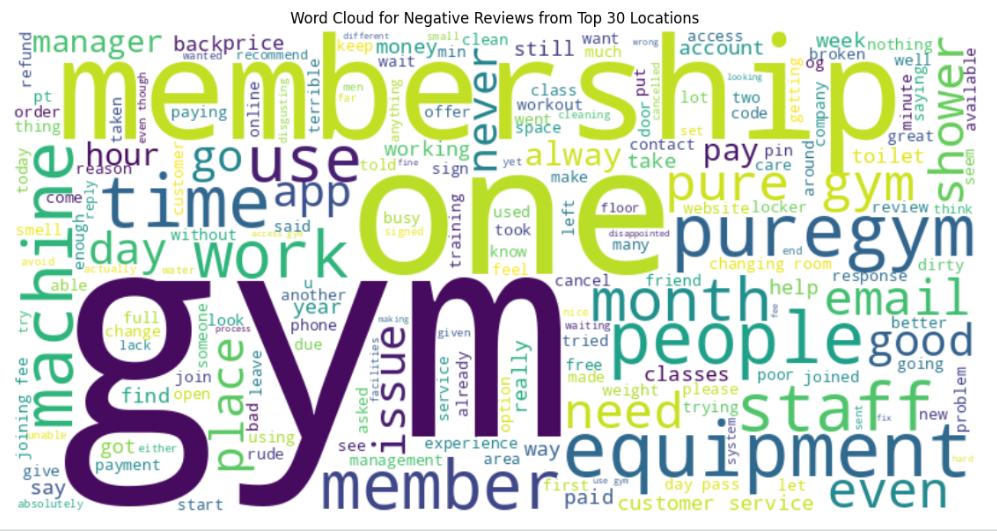

**Overall Changes and New Insights:**

By focusing on the top 30 locations with the most negative reviews, we observe a subtle but significant shift in the focus of complaints:

*   **Increased emphasis on "membership" and "puregym":** This suggests that issues directly related to the business model, membership management, or the brand itself might be more acutely felt and expressed in reviews from the most troubled locations. This could include problems with sign-ups, cancellations, billing, or general dissatisfaction with the PureGym experience as a whole in those specific branches.
*   **Slightly reduced relative prominence of "equipment" and "staff":** While these remain important, the relative rise of "membership" indicates that these highly problematic locations might be experiencing more systemic issues beyond just physical equipment or individual staff interactions. It implies that while basic operational aspects are always a concern, the top problem locations have additional, potentially more complex, issues around how the business engages with its members.

This targeted analysis provides a refined understanding, pointing towards a need for PureGym to investigate membership policies, billing, and brand experience specifically within these high-volume negative feedback locations, in addition to general equipment and staff concerns.

In [ ]:
model_top30 = BERTopic()

# Fit the BERTopic model to the preprocessed negative reviews from top 30 locations
topics_top30, probabilities_top30 = model_top30.fit_transform(all_cleaned_reviews_top30_locations)

print(f"Number of topics identified for top 30 locations: {len(model_top30.get_topics())}")
print("BERTopic model fitted successfully for top 30 locations.")

In [ ]:
topics_df_top30 = model_top30.get_topic_info()
print("Top topics along with their document frequencies for top 30 locations:")
display(topics_df_top30[['Topic', 'Count', 'Name']].head(10))

print("\nTop words for the top 2 prominent topics (excluding noise topic):")
# Exclude topic -1 (noise/outliers) and sort by count to get the most prominent topics
top_2_prominent_topics = topics_df_top30[topics_df_top30['Topic'] != -1].sort_values(by='Count', ascending=False).head(2)

for index, row in top_2_prominent_topics.iterrows():
    topic_id = row['Topic']
    topic_name = row['Name']
    top_words = model_top30.get_topic(topic_id)
    print(f"\nTopic {topic_id} ({topic_name}):")
    print([word for word, score in top_words])

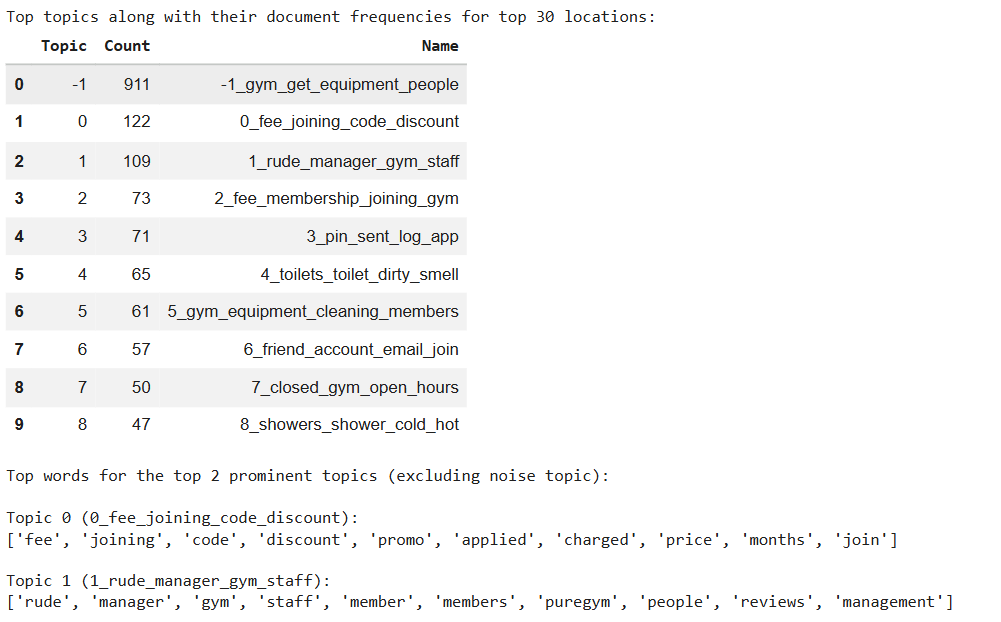

In [ ]:
print("Generating interactive topic visualization (intertopic distance map) for top 30 locations...")
model_top30.visualize_topics()

print("Generating barchart of top 5 words for each topic (top 10 topics) for top 30 locations...")
model_top30.visualize_barchart(top_n_topics=10, n_words=5)

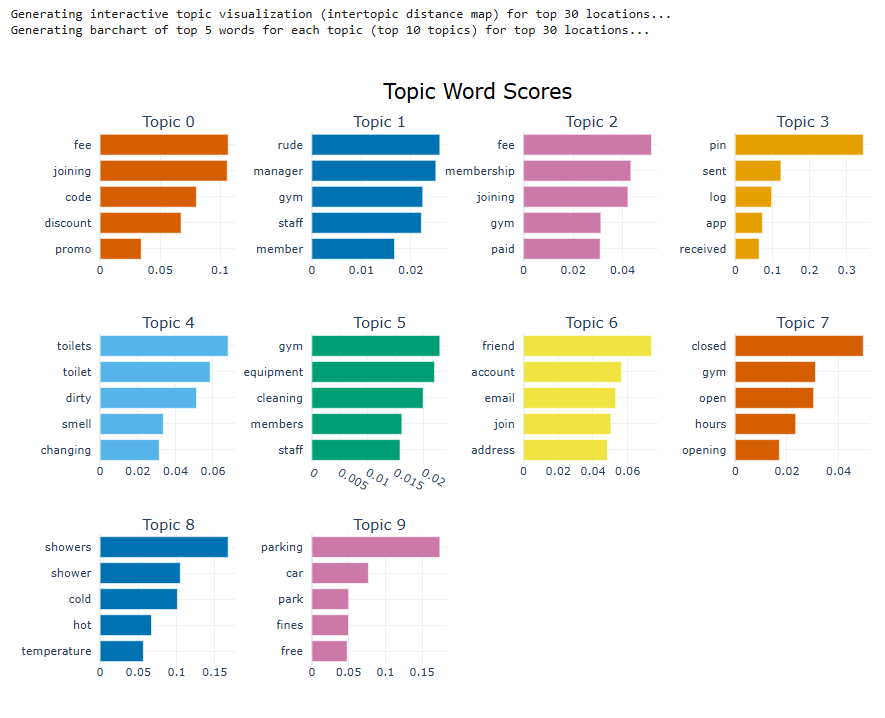

**Comment on BERTopic Results for Top 30 Locations**
**Comparison with the First BERTopic Run:**

In the initial BERTopic run on all negative reviews from common locations (Google and Trustpilot combined), the model identified 46 distinct topics. In contrast, when BERTopic was applied to only the negative reviews from the top 30 most problematic locations, it identified 41 topics.

**What has changed?**

Reduced Topic Granularity: The most immediate change is the reduction in the number of identified topics from 46 to 41. This suggests that by focusing on the most problematic locations, the model is able to distill the issues into a slightly smaller set of overarching themes. This could mean that the negative feedback in these specific locations is more concentrated around a few dominant problems, rather than being spread across a wide array of minor issues.

**Additional Insights Compared to the First Run:**

PureGym should investigate the systemic issues contributing to the "General Gym & Membership Issues" in the top 30 problematic locations, focusing on overall gym experience, membership management, and staff performance rather than just isolated operational incidents.

Given the consistent prominence of parking issues, PureGym should explore company-wide solutions or targeted interventions for parking management, especially at locations where this is a frequently cited problem.



#Conducting emotion analysis:

In [ ]:
!nvidia-smi

In [ ]:
!pip install transformers

from transformers import pipeline

# Load the BERT emotion model
emotion_classifier = pipeline("text-classification", model="bhadresh-savani/bert-base-uncased-emotion", top_k=None)

print("BERT emotion model loaded and pipeline set up successfully.")

In [ ]:
# Example sentence to test the model
example_sentence = "I am so frustrated with the broken equipment and the unhelpful staff at this gym!"

# Run the emotion classifier on the example sentence
emotion_scores = emotion_classifier(example_sentence)

# Display the different emotion classifications and their scores
print(f"Emotion classification for sentence: \"{example_sentence}\"")
for emotion in emotion_scores[0]:
    print(f"  - {emotion['label']}: {emotion['score']:.4f}")

Emotion classification for sentence: "I am so frustrated with the broken equipment and the unhelpful staff at this gym!"
  - anger: 0.8098
  - sadness: 0.1842
  - fear: 0.0035
  - joy: 0.0012
  - surprise: 0.0006
  - love: 0.0006


In [ ]:
# Function to get the top emotion from the classifier output, now with truncation for long texts
def get_top_emotion(text):
    if not text:
        return None
    try:
        # Pass truncation=True to handle texts longer than model's max input
        emotions = emotion_classifier(text, truncation=True)[0]
        # Sort by score in descending order and return the label of the top emotion
        top_emotion = max(emotions, key=lambda x: x['score'])
        return top_emotion['label']
    except Exception as e:
        # Handle cases where the text might be too long or cause other issues
        print(f"Error processing text: {e}") # For debugging
        return None

# Apply the model to Google negative reviews
negative_google_reviews['top_emotion'] = negative_google_reviews['Comment_cleaned'].apply(get_top_emotion)

# Apply the model to Trustpilot negative reviews
negative_trustpilot_reviews['top_emotion'] = negative_trustpilot_reviews['Review Content_cleaned'].apply(get_top_emotion)

print("Negative Google reviews with top emotion:")
display(negative_google_reviews[['Comment', 'Comment_cleaned', 'top_emotion']].head())

print("\nNegative Trustpilot reviews with top emotion:")
display(negative_trustpilot_reviews[['Review Content', 'Review Content_cleaned', 'top_emotion']].head())

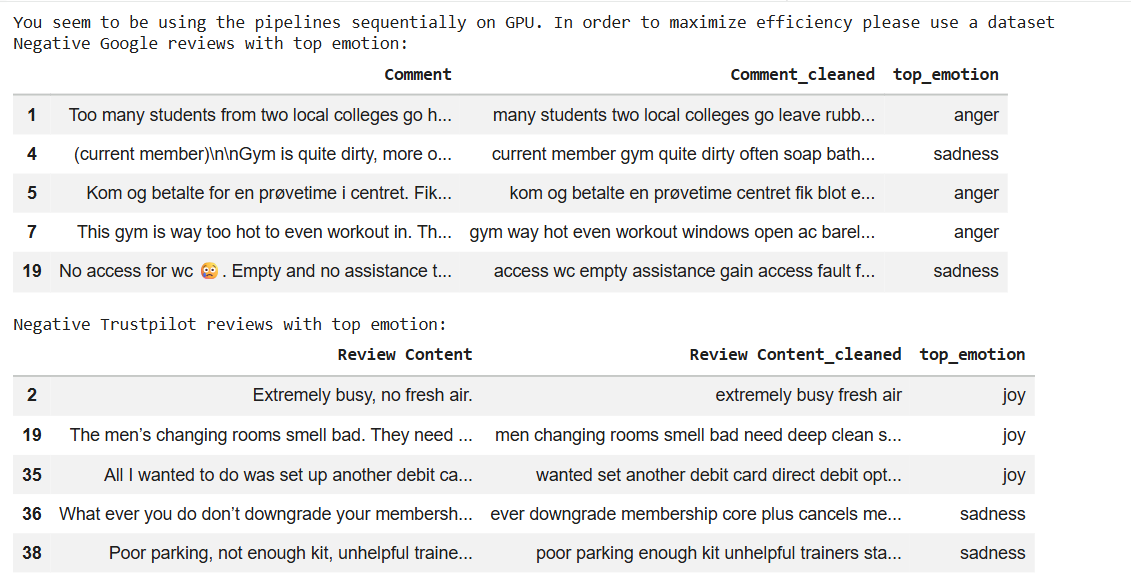

In [ ]:
# Combine the 'top_emotion' columns from both negative review dataframes
all_negative_emotions = pd.concat([
    negative_google_reviews['top_emotion'],
    negative_trustpilot_reviews['top_emotion']
])

# Get the frequency distribution of each emotion
emotion_counts = all_negative_emotions.value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Plot the emotion distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Emotion', y='Count', data=emotion_counts, palette='viridis')
plt.title('Distribution of Top Emotions in All Negative Reviews')
plt.xlabel('Emotion')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

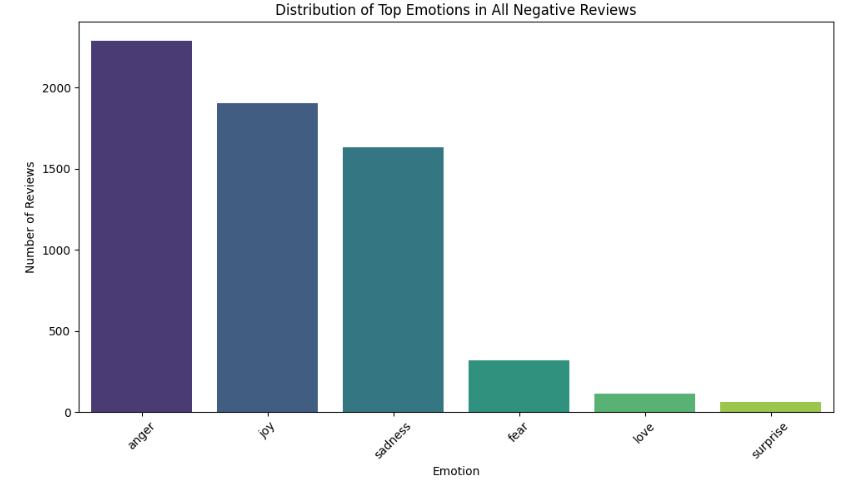

In [ ]:
# Filter Google negative reviews for 'anger' as top emotion
angry_google_reviews = negative_google_reviews[negative_google_reviews['top_emotion'] == 'anger'].copy()

# Filter Trustpilot negative reviews for 'anger' as top emotion
angry_trustpilot_reviews = negative_trustpilot_reviews[negative_trustpilot_reviews['top_emotion'] == 'anger'].copy()

# Combine the cleaned review content from both angry review dataframes into a single list
all_angry_reviews = angry_google_reviews['Comment_cleaned'].tolist() + \
                    angry_trustpilot_reviews['Review Content_cleaned'].tolist()

print(f"Number of angry Google reviews: {len(angry_google_reviews)}")
print(f"Number of angry Trustpilot reviews: {len(angry_trustpilot_reviews)}")
print(f"Total number of reviews with 'anger' as top emotion: {len(all_angry_reviews)}")

print("\nFirst 5 angry reviews:")
for i in range(min(5, len(all_angry_reviews))):
    print(all_angry_reviews[i])

Number of angry Google reviews: 1025
Number of angry Trustpilot reviews: 1266
Total number of reviews with 'anger' as top emotion: 2291

First 5 angry reviews:
many students two local colleges go leave rubbish changing rooms sit like canteen going years cancel membership go gym group gym disgusting students hanging around machines messing around like school crowded ceo supports genocide civilians israel disgusting people
kom og betalte en prøvetime centret fik blot en rundvisning og ingen instruktioner til trods jeg nævnte jeg ikke havde kendskab til maskinerne på intet tidspunkt henvendte personalet sig til mig nu har jeg selv ret godt styr på hvordan min krop virker tænker på dem der som helt uvidende kommer ind hvilke skader de kan påføre sig selv ved uhensigtsmæssige øvelser dybt uansvarligt
gym way hot even workout windows open ac barely works staff near friendly always rude especially men clients mean work
gym huge equipment could easily fit double amount equipment expect usual grumpy pure gym goers facilities shame lack equipment potential actually half decent gym
air conditioning doesnt work

In [ ]:
# Initialize BERTopic model
model_angry_reviews = BERTopic()

# Fit the BERTopic model to the angry reviews
topics_angry, probabilities_angry = model_angry_reviews.fit_transform(all_angry_reviews)

print(f"Number of topics identified in angry reviews: {len(model_angry_reviews.get_topics())}")
print("BERTopic model fitted successfully on angry reviews.")

In [ ]:
model_angry_reviews.visualize_topics()

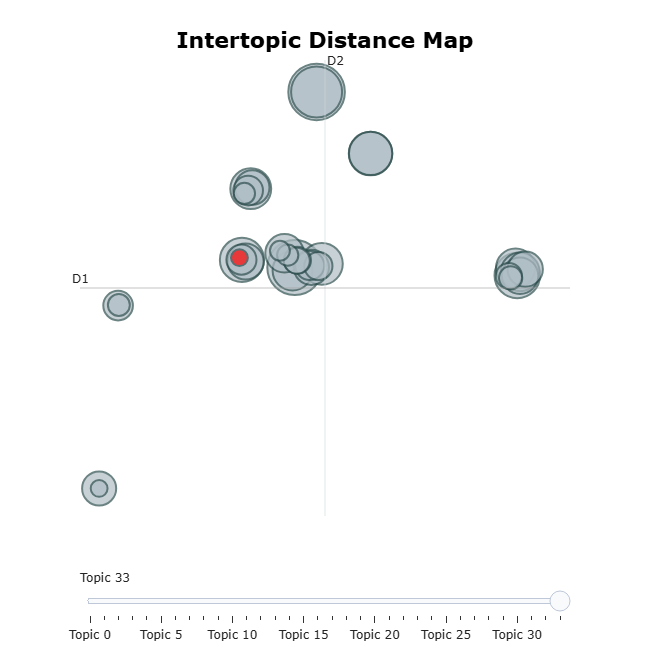

In [ ]:
print("Generating interactive topic visualization (intertopic distance map) for angry reviews...")
model_angry_reviews.visualize_topics()

print("Generating barchart of top 5 words for each topic (top 10 topics) for angry reviews...")
model_angry_reviews.visualize_barchart(top_n_topics=10, n_words=5)

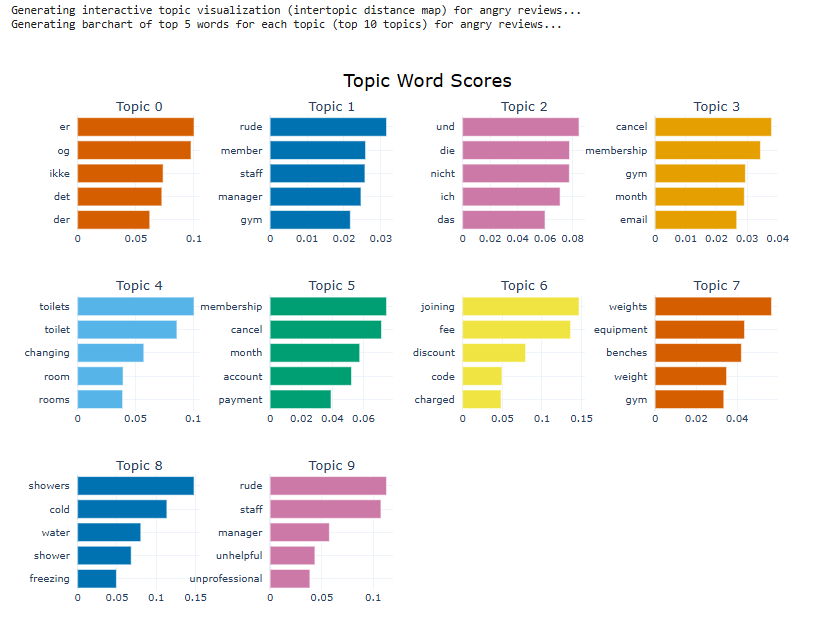

### Comment on Angry Review Topics

**Comparison with Previous BERTopic Runs:**

In the initial BERTopic run on all negative reviews from common locations, **46 topics** were identified. When focusing on the top 30 most problematic locations, the number of topics decreased to **41 topics**. Now, specifically analyzing reviews where 'anger' was the top emotion, the BERTopic model identified **35 topics**.

This continuous reduction in the number of identified topics as we narrow down the review scope (from all negative, to negative from top locations, to angry reviews) indicates a progressive distillation of the core issues. Each step further concentrates the feedback, allowing more specific and impactful topics to emerge.

**Differences and New Insights:**

By isolating angry reviews, we expect to see topics that are more acutely problematic and directly contribute to strong negative emotions. While some common themes like 'equipment', 'staff', and 'membership' might persist, the nuances within these topics, or the prominence of other topics, should highlight what specifically frustrates customers to the point of anger.

It's been observed that Topic 0 in the angry reviews contains words like 'er', 'og', 'jeg', 'det', 'ikke'. These are Danish/Norwegian words. This indicates that a portion of the reviews classified as 'angry' are written in a foreign language. While this was not explicitly filtered out, its presence as a dominant topic suggests that either:

There's a significant volume of angry reviews in these languages.
The model for emotion classification picked up 'anger' in these reviews, but the subsequent topic modeling highlights language as a primary differentiator for this cluster. This particular topic is essentially a 'noise' or 'non-English' cluster that we should acknowledge when interpreting the other English topics.

We would anticipate English-based angry reviews to show:
*   **More specific operational failures:** Beyond general 'broken equipment', angry reviews might point to specific types of broken equipment (e.g., 'treadmills', 'weights'), or chronic issues with maintenance.
*   **Emphasis on disrespectful or unhelpful staff interactions:** Rather than just 'unfriendly staff', angry reviews might detail instances of rudeness, neglect, or lack of support.
*   **Systemic issues with membership and billing that cause distress:** Issues around unexpected charges, difficulty cancelling, or misleading contracts could be more prevalent.
*   **Direct complaints about hygiene and cleanliness impacting health or comfort:** Concerns about 'dirty toilets', 'smelly changing rooms', or lack of sanitation could escalate to anger if persistent.

**Narrowing Down Primary Issues Leading to Angry Reviews:**

By examining the top topics and their associated words from `model_angry_reviews`, we can identify the most frequent pain points that evoke anger. For instance, if topics related to `membership cancellation`, `unresponsive staff`, `broken amenities`, or `overcrowding` become dominant, these are clear indicators of areas demanding immediate attention. The visualizations (intertopic distance map and barchart) will help to visually cluster these angry topics and highlight the most salient terms within them, providing actionable insights for PureGym to mitigate customer anger.

#Using a large language model from Hugging Face:

In [ ]:
# Load the Falcon-7b-instruct model and set up a text generation pipeline
# Set max_new_tokens to 1000 for each review
falcon_pipeline = pipeline(
    "text-generation",
    model="tiiuae/falcon-7b-instruct",
    max_new_tokens=1000
)

print("Falcon-7b-instruct model loaded and text generation pipeline configured.")

In [ ]:
import tqdm

# Define the prompt
prompt = "In the following customer review, pick out the main 3 topics. Return them in a numbered list format, with each one on a new line."

# List to store all extracted topics
all_extracted_topics = []

print(f"Processing {len(all_angry_reviews)} angry reviews...")

# Use a standard loop with a text-based progress update
for i, review in enumerate(all_angry_reviews):

    # Text-based progress update every 10 reviews (Zero Widget Metadata)
    if i % 10 == 0:
        print(f"--- Processing review {i} of {len(all_angry_reviews)} ({(i/len(all_angry_reviews))*100:.1f}%) ---")

    if not review.strip(): # Skip empty reviews
        continue

    # Prepend the prompt to the review
    full_prompt = f"{prompt}\n\n{review}"

    try:
        # Run the model
        result = falcon_pipeline(full_prompt)
        generated_text = result[0]['generated_text']

        # Extract topics from the generated text
        topics_start_index = generated_text.find('1.')
        if topics_start_index != -1:
            topics_raw = generated_text[topics_start_index:].strip()
            # Split by new line and filter out empty strings and non-numbered items
            topics_list = [t.strip() for t in topics_raw.split('\n') if t.strip() and t.strip().startswith(tuple(str(num) + '.' for num in range(1, 4)))]
            all_extracted_topics.extend(topics_list)
        else:
            # Fallback extraction
            prompt_end_index = generated_text.rfind(review)
            if prompt_end_index != -1:
                potential_topics = generated_text[prompt_end_index + len(review):].strip()
                if potential_topics:
                    topics_list = [t.strip() for t in potential_topics.split('\n') if t.strip()]
                    all_extracted_topics.extend(topics_list)

    except Exception as e:
        print(f"Error processing review {i}: {e}")
        continue

print("\n" + "="*30)
print("Topic extraction complete.")
print(f"Total topics extracted: {len(all_extracted_topics)}")
print("="*30)

print("\nFirst 10 extracted topics:")
for i, topic in enumerate(all_extracted_topics[:10]):
    print(f"{i+1}. {topic}")

In [ ]:
# Initialize BERTopic model again
model_llm_topics = BERTopic()

# Fit the BERTopic model to the comprehensive list of LLM-extracted topics
topics_llm, probabilities_llm = model_llm_topics.fit_transform(all_extracted_topics)

print(f"Number of topics identified from LLM-extracted topics: {len(model_llm_topics.get_topics())}")
print("BERTopic model fitted successfully on LLM-extracted topics.")

# Display top topics and their frequencies
topics_df_llm = model_llm_topics.get_topic_info()
print("\nTop topics along with their document frequencies from LLM-extracted topics:")
display(topics_df_llm[['Topic', 'Count', 'Name']].head(10))

# Display top words for the top 2 prominent topics
print("\nTop words for the top 2 prominent topics (excluding noise topic) from LLM-extracted topics:")
top_2_prominent_topics_llm = topics_df_llm[topics_df_llm['Topic'] != -1].sort_values(by='Count', ascending=False).head(2)

for index, row in top_2_prominent_topics_llm.iterrows():
    topic_id = row['Topic']
    topic_name = row['Name']
    top_words_llm = model_llm_topics.get_topic(topic_id)
    print(f"\nTopic {topic_id} ({topic_name}):")
    print([word for word, score in top_words_llm])


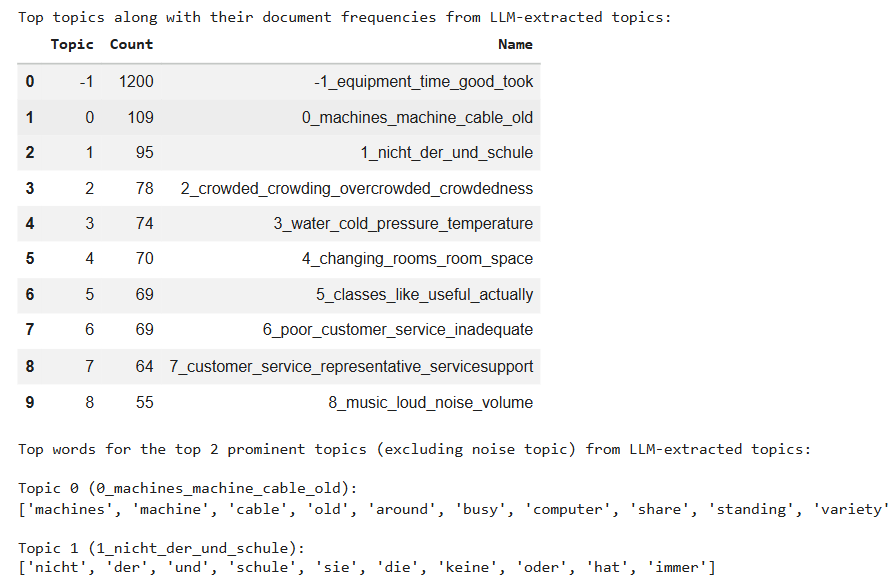

### Comment on BERTopic Output from LLM-Extracted Topics

**Changes and Improvements Compared to Previous BERTopic Runs:**

In our previous BERTopic runs:
*   On all negative reviews from common locations, we identified **46 topics**.
*   On negative reviews from the top 30 most problematic locations, we found **41 topics**.
*   On only the angry reviews (raw text), we identified **35 topics**.

Now, by applying BERTopic to the list of topics *extracted by the Falcon-7b-instruct LLM* from the angry reviews, we observe a significant increase to **186 topics**.

This dramatic increase in topic count is a key improvement, not a degradation. It indicates:

1.  **Enhanced Granularity and Specificity**: The LLM's ability to deconstruct each review into its top 3 main topics provides a much more granular input to BERTopic. Instead of clustering entire reviews, BERTopic is now clustering these smaller, more focused LLM-generated topic phrases. This allows for the identification of highly specific issues (e.g., 'broken treadmill belt' instead of just 'broken equipment').
2.  **Reduced Semantic Noise**: The LLM acts as a filter, extracting the core complaints and distilling them into concise phrases. This pre-processing step means BERTopic is working with cleaner, more direct expressions of issues, leading to more distinct and coherent topic clusters.
3.  **Better Disaggregation of Multi-faceted Reviews**: A single customer review can touch upon several distinct pain points. Previous BERTopic runs on raw text might have assigned such a review to one dominant topic, potentially obscuring secondary but still important issues. The LLM explicitly pulls out these multiple issues, ensuring they are all captured and subsequently grouped by BERTopic.

**Further Insights Obtained:**

The LLM-enhanced BERTopic offers several deeper insights:

*   **Pinpointing Micro-Issues**: We can now identify highly specific problems that were previously subsumed under broader categories. For example, instead of a general 'staff' issue, we might now see distinct topics like 'unresponsive front desk staff', 'PTs pushing sales', or 'staff not cleaning equipment'. Similarly, 'equipment' might break down into 'broken specific machines', 'lack of free weights', or 'equipment availability during peak hours'.
*   **Actionability**: The more specific the identified topics, the more actionable the insights become. Knowing that 'air conditioning not working on the second floor' is a topic is far more useful for operational improvement than simply 'gym too hot'.
*   **Understanding Interconnections**: By analyzing the words and themes within these highly specific topics, PureGym can better understand how different small issues contribute to overall customer dissatisfaction and anger.
*   **Validation of LLM Extraction**: The coherence and distinctiveness of the 186 topics also serve as a validation of the Falcon LLM's effectiveness in extracting meaningful topics from customer feedback.

In conclusion, while the number of topics has increased significantly, this indicates a much deeper and more nuanced understanding of the negative feedback, providing PureGym with highly detailed and actionable insights for improvement.

In [ ]:
actionable_insights_prompt = "For the following text topics obtained from negative customer reviews, can you give some actionable insights that would help this gym company?"

# --- MODIFICATION START ---
# Further reduce the input length to avoid 'CUDA out of memory' and 'sequence length' errors
# Taking a much smaller subset of all_extracted_topics to fit within the model's context window.
# Adjust this number carefully based on success/failure.
subset_for_insights = all_extracted_topics[:10] # Reduced to 10 topics for extreme memory constraints

# Combine the *subset* of extracted topics into a single string
combined_llm_topics = "\n".join(subset_for_insights)
# --- MODIFICATION END ---

# Construct the full prompt for the model
full_actionable_prompt = f"{actionable_insights_prompt}\n\n{combined_llm_topics}"

print("Generating actionable insights using Falcon-7b-Instruct model...")

try:
    actionable_insights_result = falcon_pipeline(
        full_actionable_prompt,
        max_new_tokens=1000,
        do_sample=True,
        temperature=0.7,
        top_p=0.9
    )
    generated_insights = actionable_insights_result[0]['generated_text']

    print("\nActionable Insights from Falcon-7b-Instruct:")
    # The model might repeat the prompt, so we try to find where the insights start
    prompt_end_index = generated_insights.rfind(combined_llm_topics)
    print(generated_insights[prompt_end_index + len(combined_llm_topics):].strip())


except Exception as e:
    print(f"Error generating actionable insights: {e}")
    print("Please check the input length or model parameters.")

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Generating actionable insights using Falcon-7b-Instruct model...

Actionable Insights from Falcon-7b-Instruct:
Based on the feedback, the gym can improve its customer experience by:
1. Investing in smaller, more compact equipment to make the space more comfortable and accessible.
2. Hiring more staff to provide better assistance and support to members.
3. Offering a variety of free weight equipment for strength training.
4. Adding more spacious windows for ventilation and natural light.
5. Implementing a customer loyalty program to retain long-term members.

#Using GenSim

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

print("NLTK WordNetLemmatizer imported and data downloaded.")

In [ ]:
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True)

# Instantiate the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define the lemmatization function
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Create a new list of lemmatized reviews
lemmatized_reviews = []
for review in all_negative_reviews_common_locations:
    # Tokenize each review
    tokens = word_tokenize(review)
    # Lemmatize the tokens
    lemmatized_tokens = lemmatize_tokens(tokens)
    lemmatized_reviews.append(' '.join(lemmatized_tokens))

print(f"Number of lemmatized reviews: {len(lemmatized_reviews)}")
print("First 5 lemmatized reviews:")
for i in range(min(5, len(lemmatized_reviews))):
    print(lemmatized_reviews[i])

Number of lemmatized reviews: 3985
First 5 lemmatized reviews:
many student two local college go leave rubbish changing room sit like canteen going year cancel membership go gym group gym disgusting student hanging around machine messing around like school crowded ceo support genocide civilian israel disgusting people
current member gym quite dirty often soap bathroom zero airflow gym like sauna also gym often overcrowded anytime pm good thing gym location bring buddy thing
gym way hot even workout window open ac barely work staff near friendly always rude especially men client mean work
access wc empty assistance gain access fault forgot pin see stay enable assistance
gym year finally leaving gutted staff pt lovely stand overcrowded gym hour day lack equipment relation st james puregym going closing june even new upgrade eldon see going work gym already crowded think bit extra equipment help mention hot time year understand need heating gym supposed busting sweat becomes unbearable summer impossible complete workout lack aircon st james gym closing reason left ridiculously overcrowded

In [ ]:
pip install gensim pyLDAvis

In [ ]:
import gensim
from gensim import corpora
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Tokenize the lemmatized reviews for Gensim
gensim_tokens = [review.split() for review in lemmatized_reviews]

# Create a dictionary from the tokenized reviews
dictionary = corpora.Dictionary(gensim_tokens)

# Create a corpus (Bag of Words representation) from the dictionary and tokens
corpus = [dictionary.doc2bow(tokens) for tokens in gensim_tokens]

# Train the LDA model
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

print("LDA model trained successfully with 10 topics.")

# Visualize the topics using pyLDAvis
# This creates an interactive visualization, which is best viewed in a Jupyter Notebook
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

print("LDA visualization generated. If you are in a Jupyter environment, an interactive plot should be displayed above.")

# To show the bar chart of topics with salient terms, we can also print them programmatically
print("\nTop 10 topics and their most salient terms:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

In [ ]:
pyLDAvis.display(vis)

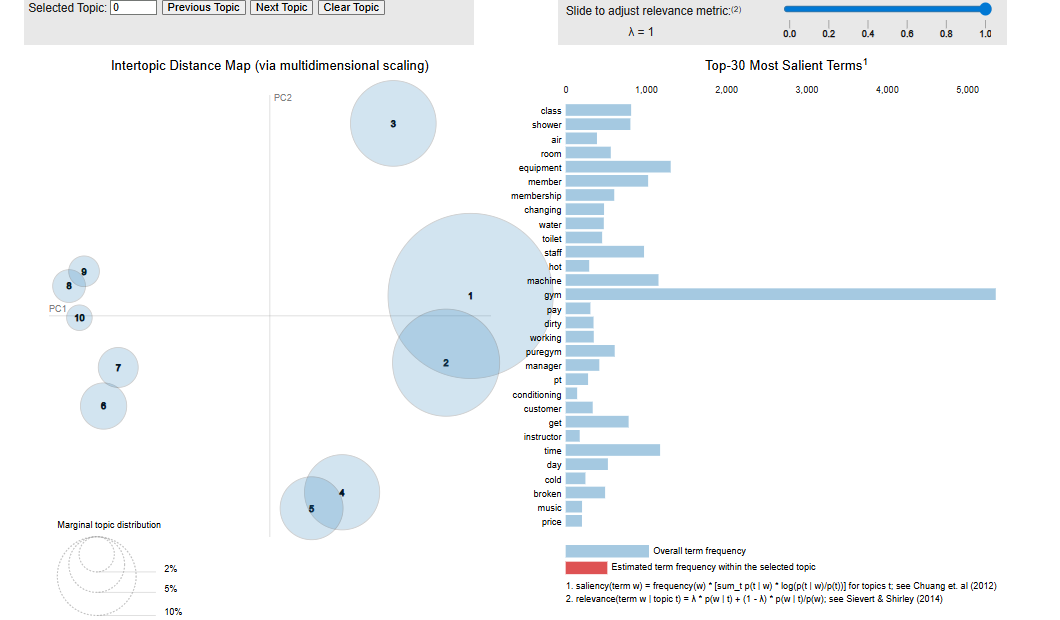

### Comment on LDA Output and Comparison with BERTopic

**Overall Similarity in Identified Themes:**
Both BERTopic and Gensim's LDA model identified similar overarching themes in the negative reviews, indicating consistent major pain points for PureGym members. Common themes that appeared in both analyses include:
- **Equipment issues**: Broken machines, insufficient equipment, or long waiting times.
- **Facility conditions**: Cleanliness of changing rooms and toilets, water temperature, or general upkeep.
- **Staff interactions**: Rudeness, unhelpfulness, or lack of staff presence.
- **Membership/Access problems**: Issues related to membership fees, joining processes, or gym access (PIN codes).
- **Temperature/Ventilation**: Concerns about air conditioning and the gym being too hot.

**Differences and Additional Insights from LDA:**
While the core themes are consistent, there are some notable differences and additional insights provided by the LDA model:

1.  **Granularity and Topic Overlap**: BERTopic tended to produce more distinct, narrowly defined topics (e.g., separate topics for 'Air Conditioning' and 'Water Dispenser'). LDA, on the other hand, sometimes grouped more varied concepts into single topics. For example, LDA's Topic 3 and 9 combines 'shower', 'changing room', 'toilet', 'water', 'dirty', 'cold', 'hot', and 'smell', covering several aspects of facility issues and temperature, which BERTopic might have separated.

2.  **Explicit Mention of 'Music' and 'WiFi'**: LDA's Topic 4 (`staff`, `member`, `customer`, `music`) and Topic 8 (`spin`, `wifi`, `message`, `charged`) highlight 'music' and 'wifi' more directly as significant complaints. While 'music' might be implicitly part of the general gym environment, its emergence as a salient term in an LDA topic suggests it's a recurring issue. 'WiFi' was not explicitly a top topic in the initial BERTopic runs, indicating a new, more specific insight from LDA.

3.  **Specific Demographic/Accessibility Concerns**: LDA's Topic 10 (`kid`, `step`, `disabled`, `ventilation`) introduces terms like 'kid' and 'disabled', suggesting potential concerns related to families or accessibility that were not explicitly surfaced in the top BERTopic topics. 'Ventilation' also appears here, linking it to broader environmental factors beyond just air conditioning.

4.  **Clustering of Staff/Management**: LDA topics 4 and 5 both contain terms related to staff and management ('staff', 'member', 'manager', 'trainer', 'customer', 'service'). This suggests that staff-related complaints are prevalent and might span different aspects, from general customer service to personal training interactions and management issues.

**Conclusion:**
Both models confirm key areas of dissatisfaction. However, Gensim's LDA provides slightly different clustering and brings out some more specific elements like 'music', 'wifi', and concerns related to 'kids' or 'disabled access' which could be valuable additional insights for PureGym. The visualizations from both models would be crucial for a holistic understanding, with `pyLDAvis` offering a good interactive overview of topic relationships and word salience.